In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [56]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [57]:
df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

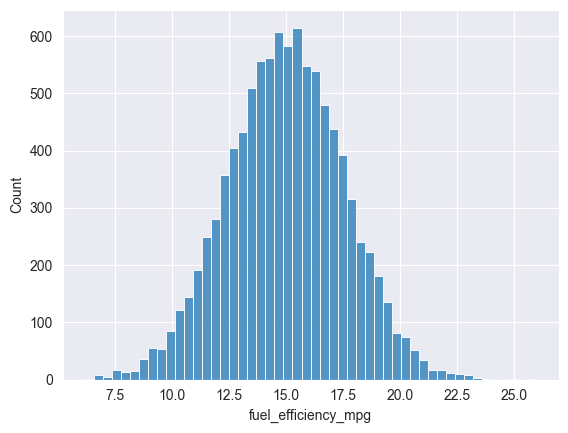

In [59]:
sns.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 100000], bins=50)

In [60]:
df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [61]:
df['horsepower'].median()

np.float64(149.0)

In [62]:
df_small = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [63]:
n = len(df_small)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [64]:
n

9704

In [65]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [66]:
df.iloc[[10, 0, 3, 5]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
10,230,5.0,100.0,3111.810181,15.4,2014,Europe,Diesel,All-wheel drive,0.0,13.386605
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818


In [67]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_small.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test  = df_shuffled.iloc[n_train+n_val:].copy()

df_train_zero = df_train.copy()
df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)


mean_hp = df_train['horsepower'].mean()
df_train_mean = df_train.copy()
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_hp)

In [68]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [69]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [70]:
len(y_train)

5824

In [71]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

X_train = df_train_zero[features].values
X_val   = df_val[features].values
X_test  = df_test[features].values

In [72]:
def predict(X, w0, w):
    return w0 + X.dot(w)

In [73]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [74]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

X_train = df_train_zero[features].values
y_train = np.log1p(df_train_zero.fuel_efficiency_mpg.values)

X_val = df_val[features].fillna(0).values
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)

w0, w = train_linear_regression(X_train, y_train)

y_pred = predict(X_val, w0, w)

rmse_zero = np.sqrt(((y_val - y_pred) ** 2).mean())
print("Zero-fill RMSE:", round(rmse_zero, 2))

Zero-fill RMSE: 0.04


In [75]:
mean_hp = df_train['horsepower'].mean()

X_train = df_train_mean[features].values
y_train = np.log1p(df_train_mean.fuel_efficiency_mpg.values)

X_val = df_val[features].copy()
X_val['horsepower'] = X_val['horsepower'].fillna(mean_hp)
X_val = X_val.values
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)

w0, w = train_linear_regression(X_train, y_train)

y_pred = predict(X_val, w0, w)

rmse_mean = np.sqrt(((y_val - y_pred) ** 2).mean())
print("Mean-fill RMSE:", round(rmse_mean, 2))

Mean-fill RMSE: 0.04


In [78]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [79]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

X_train = df_train[features].fillna(0).values
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)

X_val = df_val[features].fillna(0).values
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)

In [81]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [82]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_list:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, round(score, 2))

0 0.04
0.01 0.04
0.1 0.04
1 0.04
5 0.04
10 0.04
100 0.04


In [87]:
seeds = [0,1,2,3,4,5,6,7,8,9]
scores = []

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(len(df_small))
    np.random.shuffle(idx)
    df_shuffled = df_small.iloc[idx]

    n = len(df_shuffled)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test  = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val   = np.log1p(df_val.fuel_efficiency_mpg.values)

    features = ['engine_displacement','horsepower','vehicle_weight','model_year']
    X_train = df_train[features].fillna(0).values
    X_val   = df_val[features].fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)

print("Scores:", scores)

Scores: [np.float64(0.03801775537104819), np.float64(0.039278853338995105), np.float64(0.03944653052696821), np.float64(0.038727637039551656), np.float64(0.03727535850045066), np.float64(0.039384388340472844), np.float64(0.03890763931474179), np.float64(0.03837971626919168), np.float64(0.04018986975307275), np.float64(0.038607646441651766)]


In [84]:
std = np.std(scores)
print("STD:", round(std, 3))

STD: 0.001


In [93]:
np.random.seed(9)
idx = np.arange(len(df_small))
np.random.shuffle(idx)
df_shuffled = df_small.iloc[idx]

n = len(df_shuffled)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test  = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

X_full_train = df_full_train[features].fillna(0).values
y_full_train = df_full_train.fuel_efficiency_mpg.values

X_test = df_test[features].fillna(0).values
y_test = df_test.fuel_efficiency_mpg.values


w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred = w0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred)
print("Test RMSE:", round(test_rmse, 3))

Test RMSE: 0.516
